Using TensorFlow backend.
C:\Users\sony\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sony\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sony\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sony\anaconda3

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                48        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Epoch 1/400
 - 0s - loss: 6742.7011
Epoch 2/400
 - 0s - loss: 1620.0550
Epoch 3/400
 - 0s - loss: 1633.0280
Epoch 4/400
 - 0s - loss: 1495.4840
Epoch 5/400
 - 0s - loss: 1478.5262
Epoch 6/400
 - 0s - loss: 1491.5667
Epoch 7/400
 - 0s - loss: 1411.1833
Epoch 8/400
 -

Epoch 189/400
 - 0s - loss: 531.2092
Epoch 190/400
 - 0s - loss: 552.3841
Epoch 191/400
 - 0s - loss: 520.5356
Epoch 192/400
 - 0s - loss: 553.7873
Epoch 193/400
 - 0s - loss: 525.0142
Epoch 194/400
 - 0s - loss: 528.6474
Epoch 195/400
 - 0s - loss: 532.9602
Epoch 196/400
 - 0s - loss: 584.1407
Epoch 197/400
 - 0s - loss: 523.9548
Epoch 198/400
 - 0s - loss: 534.0988
Epoch 199/400
 - 0s - loss: 534.1459
Epoch 200/400
 - 0s - loss: 561.8163
Epoch 201/400
 - 0s - loss: 578.5549
Epoch 202/400
 - 0s - loss: 534.7107
Epoch 203/400
 - 0s - loss: 548.3639
Epoch 204/400
 - 0s - loss: 516.9731
Epoch 205/400
 - 0s - loss: 538.5241
Epoch 206/400
 - 0s - loss: 506.0973
Epoch 207/400
 - 0s - loss: 534.0302
Epoch 208/400
 - 0s - loss: 570.6852
Epoch 209/400
 - 0s - loss: 545.8676
Epoch 210/400
 - 0s - loss: 526.7750
Epoch 211/400
 - 0s - loss: 546.7381
Epoch 212/400
 - 0s - loss: 514.4172
Epoch 213/400
 - 0s - loss: 538.5824
Epoch 214/400
 - 0s - loss: 518.7291
Epoch 215/400
 - 0s - loss: 542.9243
E

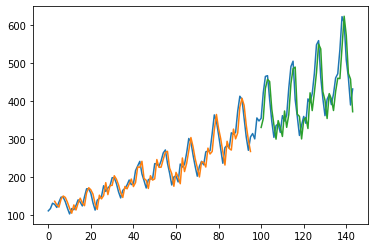

In [1]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
 
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
 
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()